## **Task One:**
The data is on the spread Dengue Fever in two cities. Your goal is to predict the total cases label. There are two cities, San Juan and Iquitos, with data for each city spanning 5 and 3 years respective. You will have to merge the data in the labels and features.
The features include:
- city – City abbreviations: sj for San Juan and iq for Iquitos
- week_start_date – Date given in yyyy-mm-dd format

**NOAA's GHCN daily climate data weather station measurements:**
- station_max_temp_c – Maximum temperature

---


- station_min_temp_c – Minimum temperature
- station_avg_temp_c – Average temperature
- station_precip_mm – Total precipitation
- station_diur_temp_rng_c – Diurnal temperature range

**PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)**
- precipitation_amt_mm – Total precipitation

**NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)**
- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_dew_point_temp_k – Mean dew point temperature
- reanalysis_air_temp_k – Mean air temperature
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity
- reanalysis_precip_amt_kg_per_m2 – Total precipitation
- reanalysis_max_air_temp_k – Maximum air temperature
- reanalysis_min_air_temp_k – Minimum air temperature
- reanalysis_avg_temp_k – Average air temperature
- reanalysis_tdtr_k – Diurnal temperature range

**Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements**
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

## **Expectations**
- Importation of the various libraries
- Merging data
- EDA: Handling anomalies in the data and visualizing the data.
- Feature engineering and feature selection.( You can go the extra mile and see how you can implement LassoCV and PCA in feature selection)
- Model development: Splitting data ( opt. Check out cross validation and see its advantages and how it is implemented), training various models(Choose the best model), hyperparameter tune the best model, test tuned model on test data set, evaluate model.

## **Load Data**

In [0]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dengue_features_train.csv to dengue_features_train.csv
Saving dengue_labels_train.csv to dengue_labels_train.csv


In [0]:
# Load the data
# feautures train
X = pd.read_csv("dengue_features_train.csv")
y = pd.read_csv("dengue_labels_train.csv")
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


### Explore the data

In [0]:
# Shape of the datasets
print(X.shape)
print(y.shape)

(1456, 24)
(1456, 4)


- The train dataset has 1456 rows and 24 columns
- The train labels dataset has 1456 rows and 4 columns

In [0]:
# check info and statistical summary of the train set
print(X.describe())
print(X.info())

              year   weekofyear  ...  station_min_temp_c  station_precip_mm
count  1456.000000  1456.000000  ...         1442.000000        1434.000000
mean   2001.031593    26.503434  ...           22.102150          39.326360
std       5.408314    15.019437  ...            1.574066          47.455314
min    1990.000000     1.000000  ...           14.700000           0.000000
25%    1997.000000    13.750000  ...           21.100000           8.700000
50%    2002.000000    26.500000  ...           22.200000          23.850000
75%    2005.000000    39.250000  ...           23.300000          53.900000
max    2010.000000    53.000000  ...           25.600000         543.300000

[8 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 n

- Most of our data is numerical except two columns which are objects i.e city and week_start_date
- Week_start_date column is an object, should be a date datatype
- We observe some missing values from some columns
- We will fill the later
- We can also check on a few outliers

### **Tidying Data**

#### Missing Values

In [0]:
print(X.isnull().sum())
print(y.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

- ndvi_ne has the most missing values
- Since most columns with the missing values account for 10% of the data, we will impute with mean
- train_labels dataset has no missing value

Due to the structure of the dataset, we fill the NA values with the most recent observation. This can be done by calling the function:

.fillna(method = 'ffill')

In [0]:
# Replace missing values with mean
X.fillna(method = 'ffill', inplace = True)

In [0]:
# Confirm
X.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

- Great

#### Duplicated Record

In [0]:
# Check for duplicated data
X.duplicated().any()

False

- No duplicated record

In [0]:
# Change to correct datatype
X['week_start_date']=pd.to_datetime(X['week_start_date'])

In [0]:
# Merge the two datasets
df=pd.merge(X, y)
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


### **EDA**

San Juan:  936
Iquitos :  520


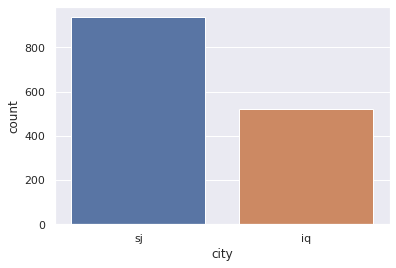

In [0]:
# Distribution of the cases in the two cities
sns.set()
ax = sns.countplot(df['city'],label="Count")
SanJuan, Iquitos = df['city'].value_counts()
print('San Juan: ', SanJuan)
print('Iquitos : ', Iquitos)

In [0]:
# Separate the data between the two cities
sj = pd.DataFrame(df.loc[df.city == 'sj'])
iq = pd.DataFrame(df.loc[df.city == 'iq'])

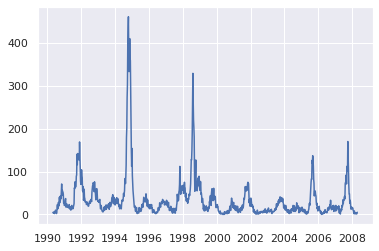

In [0]:
#show time series for both cities 
plt.plot(sj.week_start_date, sj.total_cases)

- In San Juan, the cases began somewhere in 1990 and the highest number of cases was in 1994

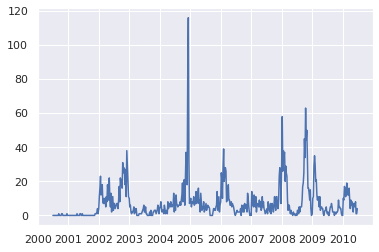

In [0]:
plt.plot(iq.week_start_date, iq.total_cases)

- In Iquitoes, the cases began around 2000 and the highest number of cases was in 2005

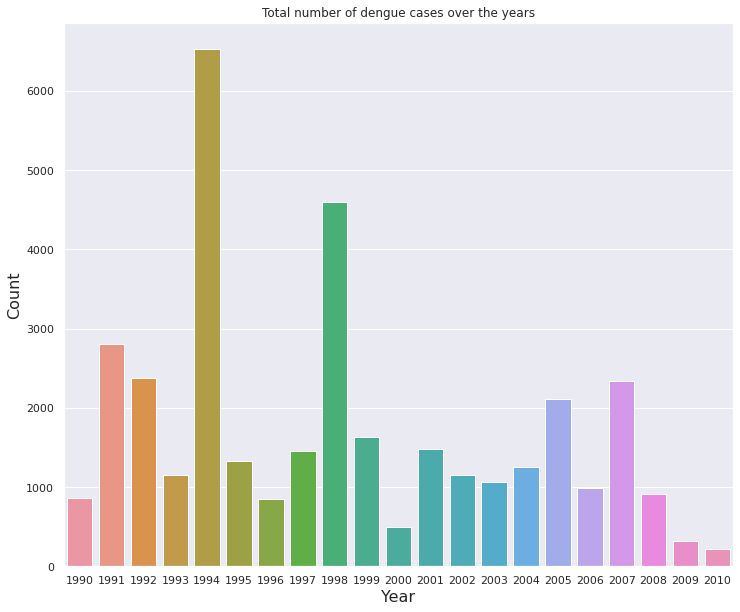

In [0]:
# What's the count of cases for each year for both cities
data_groups = df.groupby(['year'])
year = []
cases = []

for name, group in data_groups:
    year.append(name)
    cases.append(group['total_cases'].sum())

plt.figure(figsize=(12,10))
sns.set()    
sns.barplot(x=year, y=cases)
plt.title('Total number of dengue cases over the years')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

- 1994 had the most cases of dengue fever while 2010 had the least amount of cases for both cities

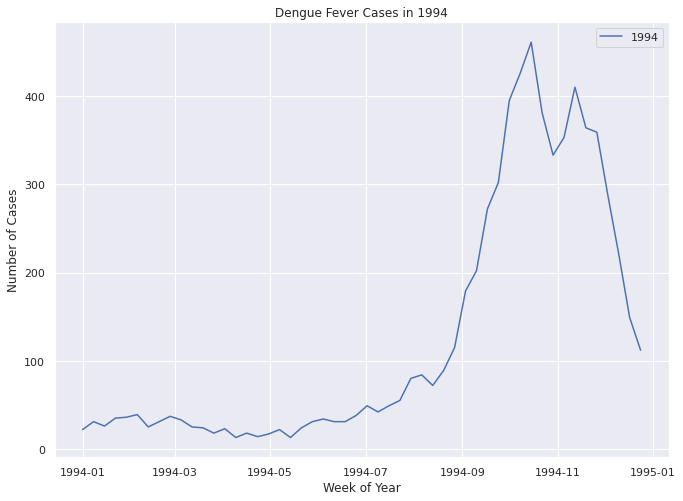

In [0]:
# closer look at the worst year
df.index = df['week_start_date']
fig,ax = plt.subplots(figsize=(11,8))
for i in np.unique(df.year.values):
    if df[df.index.year==i].total_cases.mean() >= 100:
    #df[df.year==i].total_cases > 850:

        plt.plot(df[df.year==i].total_cases,label='%d'%(i));
        plt.legend();
        plt.title('Dengue Fever Cases in 1994');
        plt.xlabel('Week of Year')
        plt.ylabel('Number of Cases')

- After a closer look, we can see that the number of cases seems to peak in the final quarter of the year.

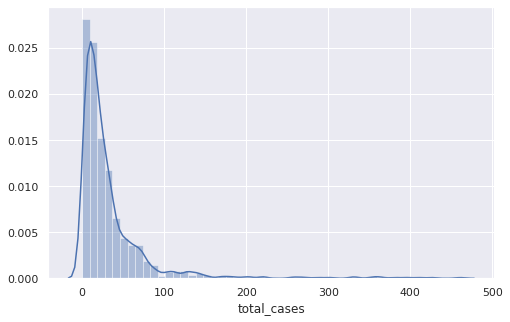

In [0]:
# Distribution of total cases in San Juan
sns.set()   
plt.figure(figsize=(8,5))
sns.distplot(sj.total_cases)
plt.show()

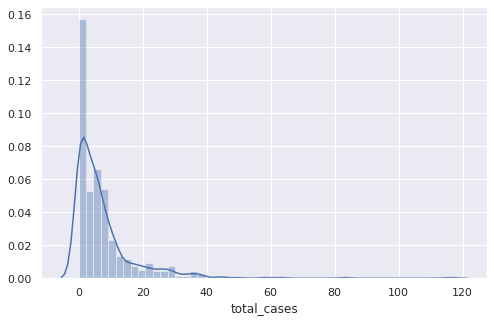

In [0]:
# Distribution of total cases in Iquitos
sns.set()   
plt.figure(figsize=(8,5))
sns.distplot(iq.total_cases)
plt.show()

- Data is highly skewed to the right

In [0]:
# Pivot table to show the total cases in the different cities, per week start date
### reset axis
df.index = df['week_start_date']
del df['week_start_date']
pv = pd.pivot_table(df, index=df.index.year, columns=df.city,
                    values='total_cases', aggfunc='sum')

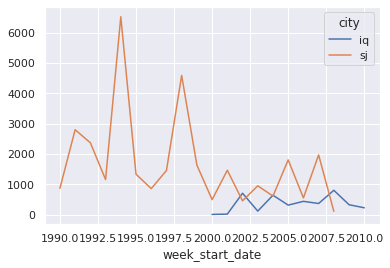

In [0]:
pv.plot()

- We observe that San Juan had more cases earlier than Iquitos 

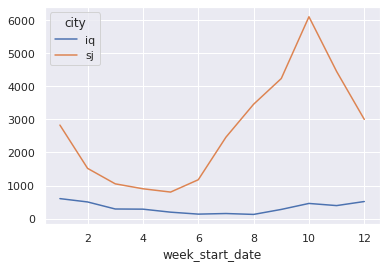

In [0]:
# Pivot table to show the total cases in the different cities per month
pv2 = pd.pivot_table(df, index=df.index.month, columns=df.city,
                    values='total_cases', aggfunc='sum')
pv2
pv2.plot()

- San Juan has more cases

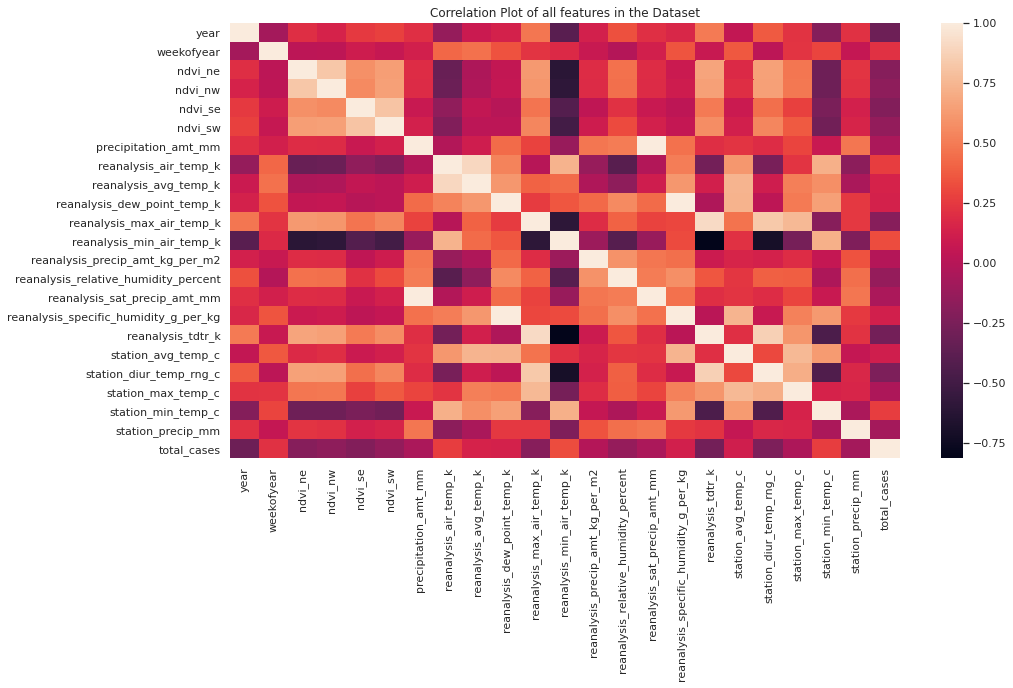

In [0]:
# COrrelation
df_corr = df.corr()
plt.figure(figsize=(15, 8))
sns.set()
sns.heatmap(df_corr)
plt.title('Correlation Plot of all features in the Dataset')
plt.show()

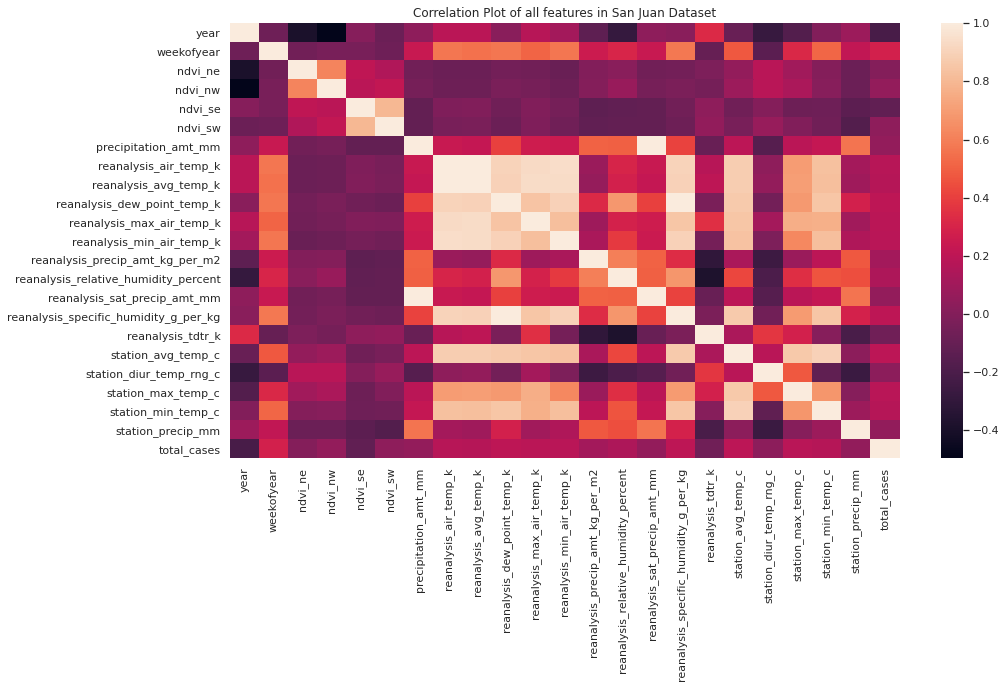

In [0]:
# San Juan
sj_corr = sj.corr()
plt.figure(figsize=(15, 8))
sns.set()
sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in San Juan Dataset')
plt.show()

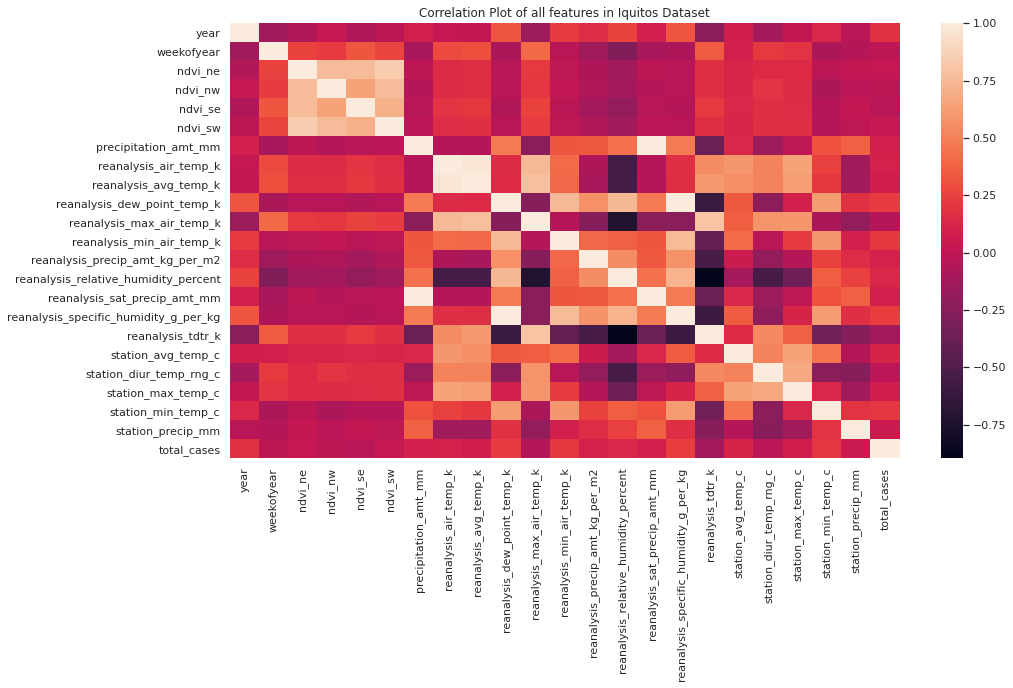

In [0]:
# Iquitos
iq_corr = iq.corr()
plt.figure(figsize=(15, 8))
sns.set()
sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in Iquitos Dataset')
plt.show()

San Juan and Iquitos have a different set of relationships among the features. The NDVI levels strongly correlate in Iquitos, but not much in San Juan. 

The temperature features move together in San Juan, but not Iquitos. Again, this points to the need for different models for each city.

### Feature Engineering

In [0]:
# label encoding the categorical column
cat_cols = ['city']
df = pd.get_dummies(df, columns=cat_cols)

df.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-30,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1990-05-07,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1
1990-05-14,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1
1990-05-21,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1
1990-05-28,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1


In [0]:
# scale the data



### Modelling

#### 1. Linear Regression - Baseline Model

In [0]:
# Train Test split
from sklearn.model_selection import train_test_split
y = df['total_cases']
x = df.drop(['total_cases'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((1164, 24), (292, 24))

In [0]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Initialize
lr.fit(X_train, y_train) # Fit the model
y_pred_lr = lr.predict(X_test) # predict

In [0]:
# Evaluate the model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i|
 
Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1n∑i=1n(yi−y^i)2

In [0]:
def printMetrics(algo, testdata, predata):
    mae = metrics.mean_absolute_error(testdata, predata)
    mse = metrics.mean_squared_error(testdata, predata)
    rmse = np.sqrt(metrics.mean_absolute_error(testdata, predata))
    r2 = metrics.r2_score(testdata, predata)
    
    print(algo)
    print('Mean absolute error: ', mae)
    print('Mean Squared error: ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Score: ', r2)

In [0]:
printMetrics('Linear Regression', y_test, y_pred_lr)

Linear Regression
Mean absolute error:  24.713332755212313
Mean Squared error:  2593.134020988957
Root Mean Squared Error:  4.971250622852595
R2 Score:  0.1922004837225212


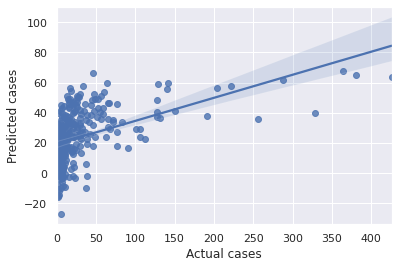

In [0]:
ax = sns.regplot(x = y_test, y = y_pred_lr)
ax.set(xlabel = 'Actual cases',
      ylabel = 'Predicted cases')
plt.show()

In [0]:
# Test and Training Scores
score = lr.score(X_train, y_train)
score2 = lr.score(X_test, y_test)

print('Training set accuracy: ', '%.2f'%(score))
print('Test set accuracy: ', '%.2f'%(score2))

Training set accuracy:  0.21
Test set accuracy:  0.19


#### 2. Random Forest

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [0]:
printMetrics("Random Forest", y_test, y_pred_rf)

Random Forest
Mean absolute error:  13.86236301369863
Mean Squared error:  945.7646654109587
Root Mean Squared Error:  3.723219442055307
R2 Score:  0.7053803493966972


In [0]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

#### 3. Lasso Regression with Cross Validation

In [0]:
# Building the Lasso model. 
lasso = Lasso()
folds = 5
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'fit_intercept': True, 'normalize': False}
-18.528190245190164


In [0]:
alpha =0.0001
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.21
Test set score: 0.19
